In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.insert(0, module_path)
from pathlib import Path

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from spectroscopy.utils import load_training_data, plot_residuals

In [4]:
from spectroscopy.model import load_model, extract_features

In [5]:
model = load_model(model_dir=Path().cwd().parent/'bin'/'model')

In [6]:
data = load_training_data()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Columns: 518 entries, 862.13 to Ammonia-N
dtypes: float64(511), int64(1), object(6)
memory usage: 991.6+ KB


In [8]:
data.describe()

,862.13,863.88,865.63,867.38,869.13,870.88,872.63,874.38,876.13,877.88,...,1740.63,1742.38,1744.13,1745.88,1747.63,1749.38,1751.13,1752.88,integration_time,Ammonia-N
count,2.450000e+02,2.450000e+02,2.450000e+02,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,...,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000
mean,1.000000e-03,1.000000e-03,1.000000e-03,-33.104287,-121.858495,-35.513932,59.391224,61.734878,61.271078,59.288657,...,54.223367,54.372829,54.504016,54.594412,54.658090,54.731698,54.824604,54.945706,40.183673,0.372816
std,4.345687e-19,4.345687e-19,4.345687e-19,67.853566,250.758444,132.077985,10.623994,10.830182,10.786321,10.594031,...,10.423182,10.412834,10.407157,10.412933,10.424849,10.430907,10.433137,10.425716,2.533978,0.281066
min,1.000000e-03,1.000000e-03,1.000000e-03,-219.800000,-831.610000,-424.710000,15.144000,15.920000,15.825000,15.246000,...,15.726000,15.858000,15.925000,15.931000,15.938000,15.998000,16.056000,16.092000,35.000000,0.090000
25%,1.000000e-03,1.000000e-03,1.000000e-03,-41.526000,-164.250000,-75.311000,56.305000,58.520000,58.199000,56.287000,...,50.024000,50.191000,50.381000,50.493000,50.551000,50.644000,50.760000,50.914000,40.000000,0.200000
50%,1.000000e-03,1.000000e-03,1.000000e-03,-18.977000,-76.295000,-20.851000,61.497000,63.536000,62.993000,61.350000,...,54.643000,54.910000,55.150000,55.322000,55.418000,55.379000,55.414000,55.548000,40.000000,0.330000
75%,1.000000e-03,1.000000e-03,1.000000e-03,11.494000,33.178000,35.535000,66.093000,68.445000,68.026000,66.013000,...,61.332000,61.493000,61.608000,61.691000,61.755000,61.797000,61.928000,61.972000,40.000000,0.460000
max,1.000000e-03,1.000000e-03,1.000000e-03,101.090000,464.490000,369.440000,76.971000,78.993000,78.589000,76.930000,...,73.491000,73.553000,73.608000,73.651000,73.713000,73.801000,73.876000,73.898000,45.000000,2.240000


In [9]:
feature_columns = extract_features(data)
X, y = data[feature_columns], data['Ammonia-N']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

<AxesSubplot:>

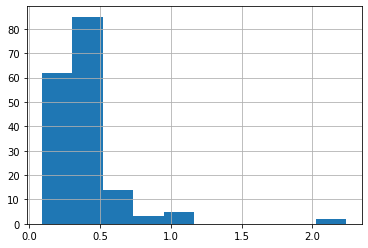

In [11]:
y_train.hist()

<AxesSubplot:>

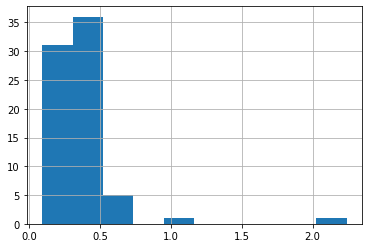

In [12]:
y_test.hist()

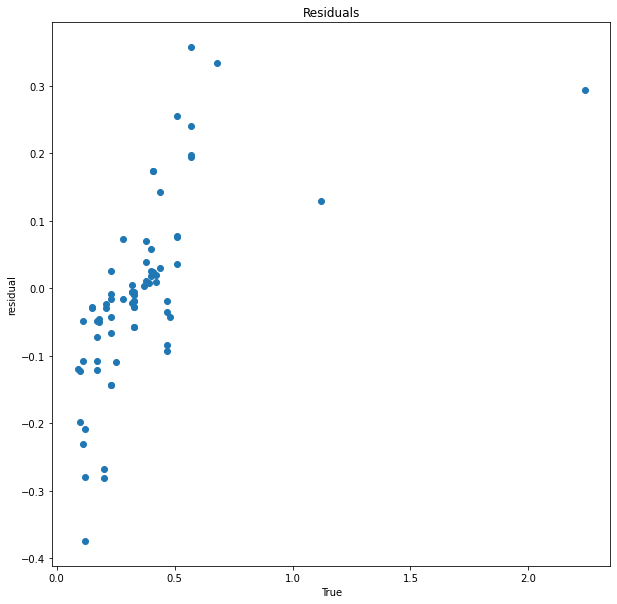

In [13]:
plot_residuals(y_test, model.predict(X_test))

In [14]:
len(X)

245